In [1]:
#we import the libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import interpolate
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import LogLocator

Exercise 7.4 Neumann

Point a)

In [2]:
import pandas as pd

data = np.loadtxt("sunspots.txt")
print("Shape of data:", data.shape)

df = pd.DataFrame(data, columns=["Month","Sunspot Number"])

print(df)

Shape of data: (3143, 2)
       Month  Sunspot Number
0        0.0            58.0
1        1.0            62.6
2        2.0            70.0
3        3.0            55.7
4        4.0            85.0
...      ...             ...
3138  3138.0            16.1
3139  3139.0            19.6
3140  3140.0            25.2
3141  3141.0            23.5
3142  3142.0            21.6

[3143 rows x 2 columns]


In [3]:
#fromt the dataframe we create a list with the Month column and another with the Sunspot Number column

Month = list(df["Month"])
Sunspot_Number = list(df["Sunspot Number"])


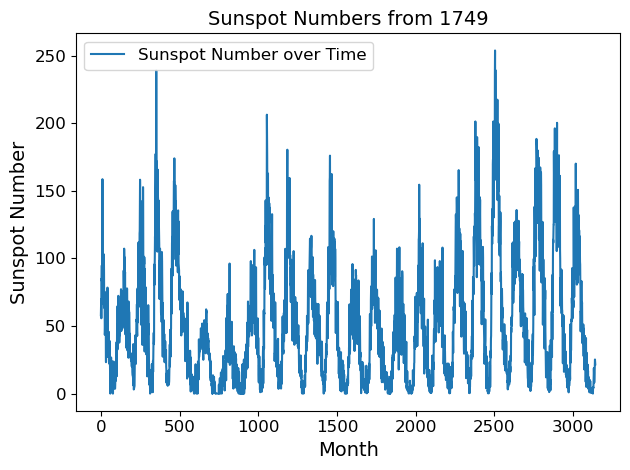

In [4]:
#now we plot the data
plt.plot(Month, Sunspot_Number, label='Sunspot Number over Time')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Sunspot Number', fontsize=14)
plt.title('Sunspot Numbers from 1749', fontsize=14)

plt.legend(fontsize=12)

plt.tick_params(axis='both', which='major', labelsize=12) 

plt.tight_layout()
plt.show()

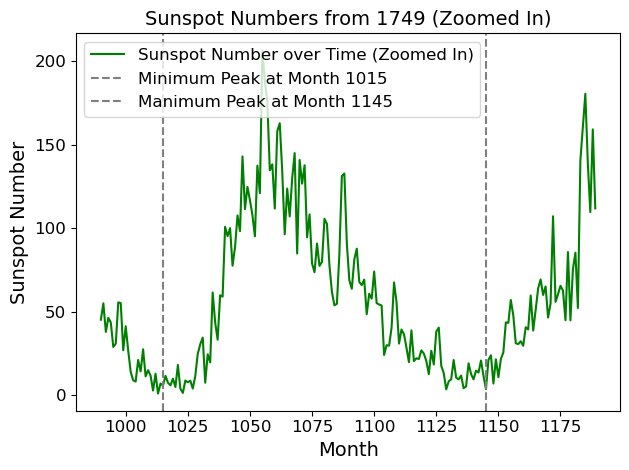

In [5]:
#to undestand the period of the sunspot we plot a zoom of the previous graph
plt.plot(Month[990:1190], Sunspot_Number[990:1190], color='green', label='Sunspot Number over Time (Zoomed In)')
plt.axvline(1015, color='grey', linestyle='--', label='Minimum Peak at Month 1015')
plt.axvline(1145, color='grey', linestyle='--', label='Manimum Peak at Month 1145')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Sunspot Number', fontsize=14)
plt.title('Sunspot Numbers from 1749 (Zoomed In)', fontsize=14)

plt.legend(fontsize=12)

plt.tick_params(axis='both', which='major', labelsize=12) 

plt.tight_layout()
plt.show()

In [6]:
#rougly we can see a periodicity of 1136-1015
print(f"The period is approximately {1136-1015} months or {(1136-1015)/12:.2f} years.")

The period is approximately 121 months or 10.08 years.


Point b)

In [7]:
#we define the function to compute the Fourier Transform
def dft(y):
    N = len(y)
    c = np.zeros(N//2+1,complex)
    for k in range(N//2+1):
        for n in range(N):
            c[k] += y[n]*np.exp(-2j*np.pi*k*n/N)
    return c

In [8]:
#we noe compute the Fourier Transform of the data with our function
Sunspot_FT = dft(Sunspot_Number)
Sunspot_FT__magnitude = np.abs(Sunspot_FT)**2

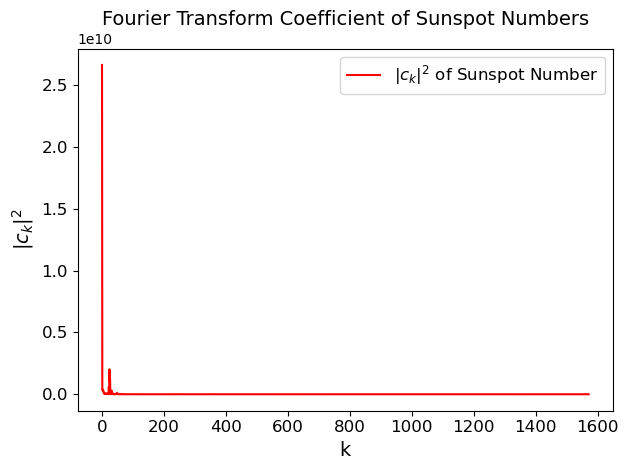

In [9]:
#we now plot the Fourier Transform
plt.plot(Sunspot_FT__magnitude, color='red', label='$|c_k|^2$ of Sunspot Number')
plt.xlabel('k', fontsize=14)
plt.ylabel('$|c_k|^2$', fontsize=14)
plt.title('Fourier Transform Coefficient of Sunspot Numbers', fontsize=14)
plt.legend(fontsize=12)

plt.tick_params(axis='both', which='major', labelsize=12) 

plt.tight_layout()
plt.show()

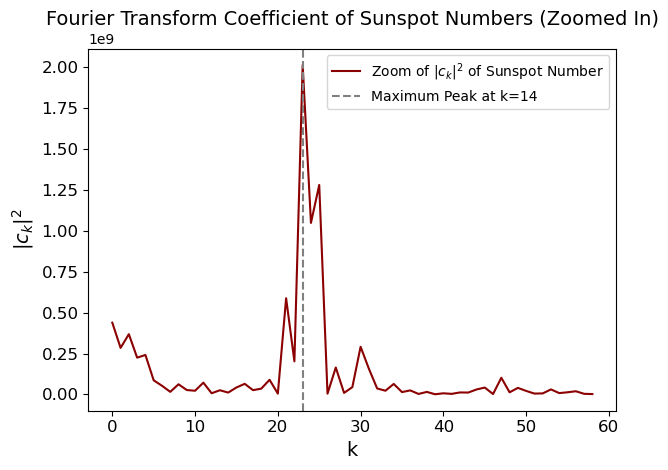

In [10]:
#we zoom in the region of the secon peak, which is the most relevant after the zero frequency peak
plt.plot(Sunspot_FT__magnitude[1:60], color='darkred', label='Zoom of $|c_k|^2$ of Sunspot Number')
plt.axvline(23, color='grey', linestyle='--', label='Maximum Peak at k=14')
plt.xlabel('k', fontsize=14)
plt.ylabel('$|c_k|^2$', fontsize=14)
plt.title('Fourier Transform Coefficient of Sunspot Numbers (Zoomed In)', fontsize=14)

plt.legend(fontsize=10)

plt.tick_params(axis='both', which='major', labelsize=12) 

plt.tight_layout()
plt.show()

Point c)

In [11]:
#we can find the correspondent frequency of the maximum peak for k different from zero
max_index = np.argmax(Sunspot_FT__magnitude[1:60])

#now we can compute the frequency and the period
N = len(Sunspot_Number)
frequency = max_index / N  # in cycles per month
period_months = 1 / frequency  # in months
period_years = period_months / 12  # in years   

print(f"The period corresponding to the maximum peak (k={max_index}) is approximately {period_months:.2f} months or {period_years:.2f} years.")

The period corresponding to the maximum peak (k=23) is approximately 136.65 months or 11.39 years.


Exercise 7.4 Neumann 

In [12]:
data = np.loadtxt("dow.txt")
print("Shape of data:", data.shape)

df = pd.DataFrame(data, columns=["Average"])

print(df)

Shape of data: (1024,)
       Average
0     12121.71
1     12136.44
2     12226.73
3     12221.93
4     12194.13
...        ...
1019  11476.54
1020  11457.47
1021  11499.25
1022  11491.91
1023  11478.13

[1024 rows x 1 columns]


Point a)

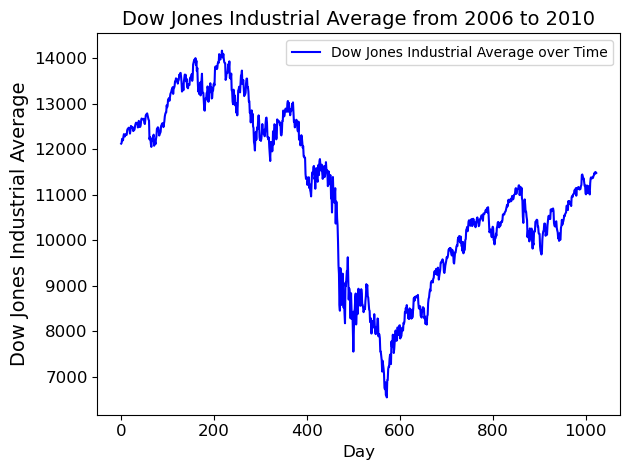

In [13]:
#we create a list with the Average column
Day = list(df.index)
Average = list(df["Average"])

#then we plot the data
plt.plot(Day, Average, color='blue', label='Dow Jones Industrial Average over Time')
plt.xlabel('Day', fontsize=12)
plt.ylabel('Dow Jones Industrial Average', fontsize=14)
plt.title('Dow Jones Industrial Average from 2006 to 2010', fontsize=14)
plt.legend(fontsize=10)

plt.tick_params(axis='both', which='major', labelsize=12) 

plt.tight_layout()
plt.show() 

Point b)

In [14]:
#we use the python function rfft to compute the Fourier Transform 
FT_Average = np.fft.rfft(Average)
FT_Average_magnitude = np.abs(FT_Average)**2 #squared magnitude of the Fourier Transform FT_Average

print(f"The shape of the Fourier Transform is: {FT_Average.shape}, which is half the size of the original data plus one, as expected for a real-valued input.")


The shape of the Fourier Transform is: (513,), which is half the size of the original data plus one, as expected for a real-valued input.


Point c)


In [15]:
#now we set all but the first 10% of the elements of this array to zero (i.e., set the last 90% to zero but keep the values of the first 10%).
FT_Average_filtered = np.copy(FT_Average) #we save the orginal array in order to compute the inverse transform wiht less data

FT_Average_filtered = np.where(np.arange(len(FT_Average_filtered)) < 0.1 * len(FT_Average_filtered), FT_Average_filtered, 0) #here we set to zero the 90% of the elements
print(f"The shape of the new array is: {FT_Average_filtered.shape}, so it is not changed.")
print(f"We see that the only first 10% of the array is non zero:\n {FT_Average_filtered}")

The shape of the new array is: (513,), so it is not changed.
We see that the only first 10% of the array is non zero:
 [ 1.12839039e+07+0.00000000e+00j  6.84127740e+05-9.55087519e+05j
 -4.19226205e+05+9.29089562e+04j  7.41901498e+04-2.73812250e+05j
 -3.51856811e+04+7.23658613e+04j  1.11482643e+05-3.14779807e+04j
  2.16752824e+04-2.45751549e+04j  1.11224416e+04+2.47975704e+04j
  3.11884665e+04+2.27868210e+04j  7.38523102e+03-3.21233427e+04j
 -3.39615972e+04-1.07833052e+05j -1.23569569e+04+2.73171276e+04j
  2.13837315e+04-9.16684147e+04j -4.32441725e+04+9.92294540e+04j
 -3.55753518e+03-2.54972743e+04j -3.04367677e+04-1.72551151e+04j
 -9.31799610e+03-2.49297658e+04j -9.35033325e+03-1.75612302e+04j
  1.17418062e+04+2.09235370e+04j  4.22549031e+04-2.38143067e+03j
  1.35294835e+04-3.06720066e+04j  4.06499470e+03-2.87140744e+04j
 -1.56146318e+04+2.24811825e+04j  1.35756353e+04-1.28123867e+04j
  1.20484888e+04+3.50866363e+03j -1.55111478e+04-1.70617041e+04j
  8.98307189e+03+4.49546331e+03j  4.

Point d)

In [16]:
#we now compute the inverse Fourier Transform using only the first 10% of the data using the array previusly created

IFT_Average_filtered = np.fft.irfft(FT_Average_filtered)
IFT_Average_filtered.shape

(1024,)

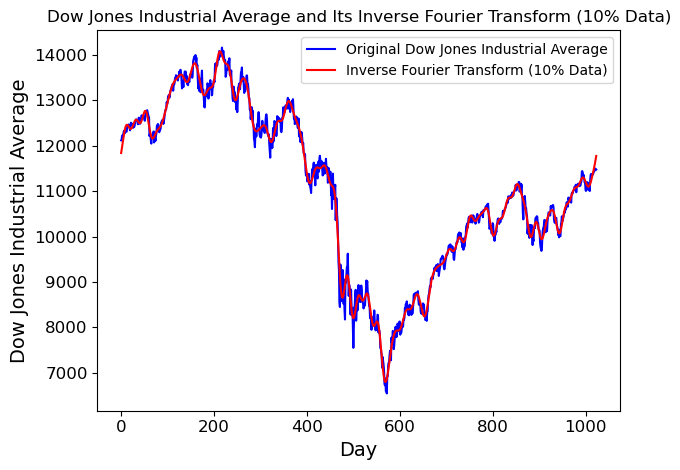

In [17]:
#now we plot this inverse Fourier transform with the original data
plt.plot(Day, Average, color='blue', label='Original Dow Jones Industrial Average')
plt.plot(IFT_Average_filtered, color='red', label='Inverse Fourier Transform (10% Data)')
plt.xlabel('Day', fontsize=14)
plt.ylabel('Dow Jones Industrial Average', fontsize=14)    
plt.title('Dow Jones Industrial Average and Its Inverse Fourier Transform (10% Data)')
plt.legend(fontsize=10)

plt.tick_params(axis='both', which='major', labelsize=12) 

plt.tight_layout()
plt.show()    

Point e)

In [18]:
#we modify to consider only the frist 2% of the data fiven by the fourier transform 

FT_Average_filtered2 = np.copy(FT_Average) #we save the orginal array in order to compute the inverse transform wiht less data

FT_Average_filtered2 = np.where(np.arange(len(FT_Average_filtered)) < 0.02 * len(FT_Average_filtered), FT_Average_filtered, 0) #here we set to zero the 98% of the elements
print(f"The shape of the new array is: {FT_Average_filtered2.shape}, so it is not changed.")
print(f"We see that the only first 10% of the array is non zero:\n {FT_Average_filtered2}")

The shape of the new array is: (513,), so it is not changed.
We see that the only first 10% of the array is non zero:
 [ 1.12839039e+07     +0.j          6.84127740e+05-955087.51914779j
 -4.19226205e+05 +92908.95615825j  7.41901498e+04-273812.25003958j
 -3.51856811e+04 +72365.86128838j  1.11482643e+05 -31477.9806891j
  2.16752824e+04 -24575.15492195j  1.11224416e+04 +24797.57044774j
  3.11884665e+04 +22786.82096782j  7.38523102e+03 -32123.34266319j
 -3.39615972e+04-107833.05229797j  0.00000000e+00     +0.j
  0.00000000e+00     +0.j          0.00000000e+00     +0.j
  0.00000000e+00     +0.j          0.00000000e+00     +0.j
  0.00000000e+00     +0.j          0.00000000e+00     +0.j
  0.00000000e+00     +0.j          0.00000000e+00     +0.j
  0.00000000e+00     +0.j          0.00000000e+00     +0.j
  0.00000000e+00     +0.j          0.00000000e+00     +0.j
  0.00000000e+00     +0.j          0.00000000e+00     +0.j
  0.00000000e+00     +0.j          0.00000000e+00     +0.j
  0.00000000e+00

In [19]:
#we now compute the inverse Fourier Transform using only the first 2% of the data using the array previusly created

IFT_Average_filtered2 = np.fft.irfft(FT_Average_filtered2)
IFT_Average_filtered2.shape

(1024,)

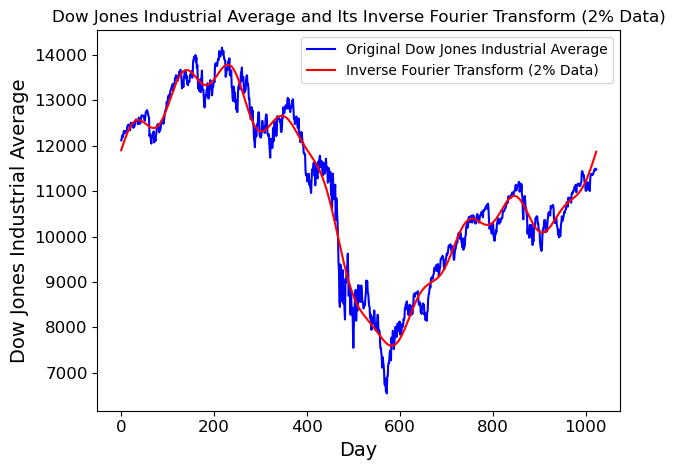

In [20]:
#now we plot this inverse Fourier transform with the original data
plt.plot(Day, Average, color='blue', label='Original Dow Jones Industrial Average')
plt.plot(IFT_Average_filtered2, color='red', label='Inverse Fourier Transform (2% Data)')
plt.xlabel('Day', fontsize=14)
plt.ylabel('Dow Jones Industrial Average', fontsize=14)    
plt.title('Dow Jones Industrial Average and Its Inverse Fourier Transform (2% Data)')
plt.legend(fontsize=10)

plt.tick_params(axis='both', which='major', labelsize=12) 

plt.tight_layout()
plt.show()    

Exercise 7.9

In [21]:
dataPhoto = np.loadtxt("blur.txt")
print("Shape of data:", data.shape)

dfPhoto = pd.DataFrame(dataPhoto)

print(dfPhoto)

Shape of data: (1024,)
           0          1          2          3          4          5     \
0     672.56065  672.34187  672.13208  671.93110  671.73872  671.55469   
1     682.04729  681.85582  681.67331  681.49954  681.33424  681.17716   
2     691.51404  691.34926  691.19339  691.04617  690.90731  690.77651   
3     700.94655  700.80779  700.67790  700.55657  700.44348  700.33829   
4     710.33054  710.21714  710.11255  710.01643  709.92842  709.84814   
...         ...        ...        ...        ...        ...        ...   
1019  625.32879  624.96497  624.61017  624.26441  623.92772  623.60007   
1020  634.70144  634.36765  634.04289  633.72715  633.42040  633.12256   
1021  644.12480  643.82057  643.52537  643.23915  642.96183  642.69329   
1022  653.58515  653.30996  653.04380  652.78657  652.53814  652.29837   
1023  663.06850  662.82180  662.58412  662.35531  662.13521  661.92361   

           6          7          8          9     ...       1014       1015  \
0     671

In [22]:
#we now save the data in one array 2D
image = dfPhoto.values #we take the data of the dataframe and we put inside the array image
print(f"The shape of the array image is: {image.shape}")

The shape of the array image is: (1024, 1024)


Point a)

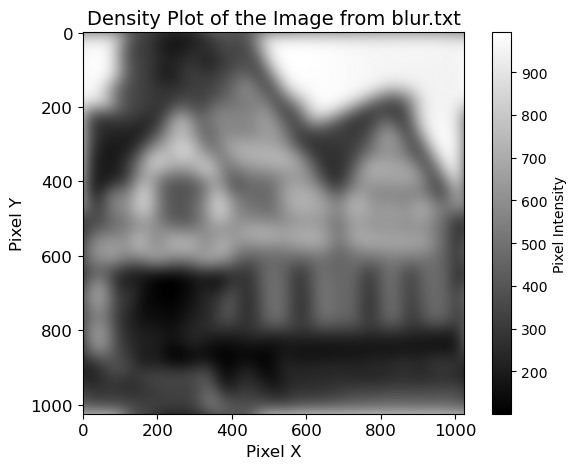

In [23]:
#we now plot a denisty plot of the image
plt.imshow(image,cmap='gray')
plt.colorbar(label='Pixel Intensity')
plt.title('Density Plot of the Image from blur.txt', fontsize=14)
plt.xlabel('Pixel X', fontsize=12)
plt.ylabel('Pixel Y', fontsize=12)

plt.tick_params(axis='both', which='major', labelsize=12) 

plt.tight_layout()
plt.show()    

Point b)

The shape of the PSF array is: (1024, 1024), which is the same as the image array.


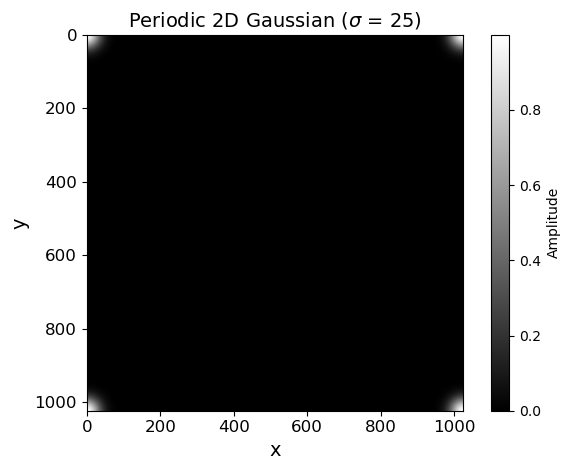

In [24]:
def gaussian_2d(x, y, sigma):
    return np.exp(-((x)**2 + (y)**2) / (2 * sigma**2))

# Grid parameters
N = 1024     # image size
L = 1024   # coordinate range
sigma = 25

# Create coordinate grid
x = np.linspace(0, L, N)
y = np.linspace(0, L, N)
X, Y = np.meshgrid(x, y)

# Center the Gaussian in the middle
spread_f = gaussian_2d(X - L/2, Y - L/2, sigma=sigma)

# Make it periodic by rolling half the image size
spread_f_periodic = np.roll(np.roll(spread_f, N//2, axis=0), N//2, axis=1)

print(f"The shape of the PSF array is: {spread_f_periodic.shape}, which is the same as the image array.")

# Show result
plt.imshow(spread_f_periodic, cmap='gray')
plt.colorbar(label='Amplitude')
plt.title(f'Periodic 2D Gaussian ($\sigma$ = {sigma})', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12) 

plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)


plt.tight_layout()
plt.show()  

Point c) 

In [25]:
#now we fourier transform both the image and the hat. Since we have to perform 2D fourier transfomr, we use the function fft2
FT_image = np.fft.rfft2(image)
FT_spread = np.fft.rfft2(spread_f_periodic)

In [26]:
#then we compute the fourier transform fo the true image by dividing the fourier transform of the blurred image by the fourier transform of the hat. We avoid to
#divide by zero by setting to zero the values of FT_spread that are smaller than a certain threshold

threshold = 1e-5
FT_spread_safe = np.where(np.abs(FT_spread) < threshold, 1, FT_spread)
FT_true_image = FT_image / FT_spread_safe

#then we get the true image by computing the inverse fourier transform of the previous array
true_image = np.fft.irfft2(FT_true_image)
print(f"The shape of the true image is: {true_image.shape}, which is the same as the original image.")       

The shape of the true image is: (1024, 1024), which is the same as the original image.


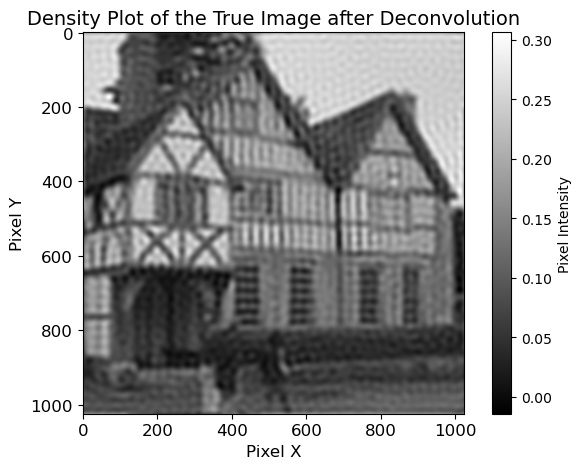

In [27]:
#we now plot the true image
plt.imshow(true_image, cmap='gray')
plt.colorbar(label='Pixel Intensity')
plt.title('Density Plot of the True Image after Deconvolution', fontsize=14)
plt.xlabel('Pixel X', fontsize=12)
plt.ylabel('Pixel Y', fontsize=12)

plt.tick_params(axis='both', which='major', labelsize=12) 

plt.tight_layout()
plt.show()  